# Project - The Battle of Neighborhoods
### Coursera Final Project

## Contents
* [Business Problem](#introduction)
* [Data Used](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Result and Discussion](#result)
* [Conclusion](#conclusion)

## 1. Business Problem <a name='introduction'></a>

In this project we will try to find the optimal place to open a **Bakery Shop** in Jakarta area. Finding the most suitable area of new Bakery Shop is important decisions that will determine whether the Bakery Shop will be success or failure.

In Jakarta itself seems to have a **lot of Bakery Shop** like **Holland Bakery**, **Bread Talk**, and many more. We try to find locations that are not already crowded with Bakery Shop.

We will use the power of data science to find some of the most favorable environmental criteria based on the above criteria. We will describe some of the most useful results so that they can be the best choice for stakeholders.

## 2. The Data <a name='data'></a>

Based on definition of our problem, there is some factors that influence our decision, such as:
* Number of existing Neighborhood in Jakarta
* Latitude and Longitude of Neighborhood
* Number of Venue, especially related to Bakery Shop

Following data sources will be needed to extract/generate the required information:
* Number of neighborhood will be obtained using **Foursquare API**
* Coordinates of Jakarta will be obtained using **json File**

In [1]:
import numpy as np # Library to handle data in a vectorized manner

import pandas as pd # Library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # Library to handle requests

import folium # Library for map rendering

from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values

**Now get the data from districts.json that I find from the github. Thanks to Mr. Yusuf Syaifudin who made this file.**

In [2]:
df_jkt = pd.read_json('districts.json')
df_jkt.head(10)

id  regency_id             name  \
0  1101010        1101   TEUPAH SELATAN   
1  1101020        1101   SIMEULUE TIMUR   
2  1101021        1101     TEUPAH BARAT   
3  1101022        1101    TEUPAH TENGAH   
4  1101030        1101  SIMEULUE TENGAH   
5  1101031        1101      TELUK DALAM   
6  1101032        1101     SIMEULUE CUT   
7  1101040        1101           SALANG   
8  1101050        1101   SIMEULUE BARAT   
9  1101051        1101           ALAFAN   

                                            alt_name  latitude  longitude  
0    South Teupah, Simeulue Regency, Aceh, Indonesia   2.38603   96.42904  
1   East Simeulue, Simeulue Regency, Aceh, Indonesia   2.51438   96.31197  
2     West Teupah, Simeulue Regency, Aceh, Indonesia   2.50500   96.21636  
3  Teupah Tengah, Kabupaten Simeulue, Aceh, Indon...   2.41594   96.33324  
4  Central Simeulue Sub-District, Simeulue Regenc...   2.62412   96.04674  
5  Teluk Dalam, South Nias Regency, North Sumatra...   0.60523   97.83952  
6  Simeulue Cut, Kabupaten Simeulue, Aceh, Indonesia   2.59997   95.93569  
7          Salang, Simeulue Regency, Aceh, Indonesia   2.66445   95.87760  
8   West Simeulue, Simeulue Regency, Aceh, Indonesia   2.78300   95.91984  
9          Alafan, Simeulue Regency, Aceh, Indonesia   2.78384   95.75105

**Now, let's catch the region "Jakarta" only using Regular Expression**

In [3]:
df_jkt = df_jkt[df_jkt['alt_name'].str.contains('.Jakarta.')]
df_jkt

id  regency_id                      name  \
688   1274020        1274                  RAMBUTAN   
1324  1607070        1607                  RAMBUTAN   
1398  1612020        1612               TANAH ABANG   
1560  1709050        1709             PONDOK KELAPA   
1565  1771011        1771            KAMPUNG MELAYU   
1907  2171080        2171                BATU AMPAR   
1913  3101010        3101  KEPULAUAN SERIBU SELATAN   
1914  3101020        3101    KEPULAUAN SERIBU UTARA   
1915  3171010        3171                 JAGAKARSA   
1916  3171020        3171              PASAR MINGGU   
1917  3171030        3171                  CILANDAK   
1918  3171040        3171              PESANGGRAHAN   
1919  3171050        3171            KEBAYORAN LAMA   
1920  3171060        3171            KEBAYORAN BARU   
1921  3171070        3171          MAMPANG PRAPATAN   
1922  3171080        3171                  PANCORAN   
1923  3171090        3171                     TEBET   
1924  3171100        3171                SETIA BUDI   
1925  3172010        3172                PASAR REBO   
1926  3172020        3172                   CIRACAS   
1927  3172030        3172                  CIPAYUNG   
1929  3172050        3172               KRAMAT JATI   
1930  3172060        3172                JATINEGARA   
1931  3172070        3172               DUREN SAWIT   
1932  3172080        3172                    CAKUNG   
1933  3172090        3172               PULO GADUNG   
1934  3172100        3172                  MATRAMAN   
1935  3173010        3173               TANAH ABANG   
1936  3173020        3173                   MENTENG   
1937  3173030        3173                     SENEN   
1938  3173040        3173                JOHAR BARU   
1939  3173050        3173             CEMPAKA PUTIH   
1940  3173060        3173                 KEMAYORAN   
1941  3173070        3173               SAWAH BESAR   
1942  3173080        3173                    GAMBIR   
1943  3174010        3174                 KEMBANGAN   
1944  3174020        3174               KEBON JERUK   
1945  3174030        3174                  PALMERAH   
1946  3174040        3174         GROGOL PETAMBURAN   
1949  3174070        3174                CENGKARENG   
1950  3174080        3174                KALI DERES   
1951  3175010        3175               PENJARINGAN   
1952  3175020        3175                PADEMANGAN   
1953  3175030        3175             TANJUNG PRIOK   
1954  3175040        3175                      KOJA   
1955  3175050        3175             KELAPA GADING   
1956  3175060        3175                 CILINCING   
2283  3209220        3209                   SUSUKAN   
2558  3276021        3276                  CIPAYUNG   
2637  3303040        3303                PENGADEGAN   
2652  3304010        3304                   SUSUKAN   
2803  3311090        3311                    GROGOL   
2966  3321030        3321                    GUNTUR   
2980  3322030        3322                   SUSUKAN   
3084  3327130        3327                   ULUJAMI   
3091  3328070        3328                JATINEGARA   
3346  3506220        3506                    GROGOL   
3906  3601070        3601                    MUNJUL   
4036  3672022        3672                    GROGOL   
4144  5203070        5203                    SELONG   
4219  5271030        5271               CAKRANEGARA   
4686  6112010        6112                BATU AMPAR   
4781  6208041        6208                BATU AMPAR   
4850  6301070        6301                BATU AMPAR   
4915  6305040        6305                    BUNGUR   
5045  6404031        6404                BATU AMPAR   
7016  9430061        9430                   MELAGAI   
7018  9430071        9430                    WEREKA   

                                               alt_name  latitude  longitude  
688   Rambutan, Ciracas, East Jakarta City, Special ...  -6.30511  106.87389  
1324  Rambutan, Ciracas, East Jakarta City, Special ...  

**Now dismiss the value that we would not need like "id","regency_id","alt_name"**

In [4]:
df_jkt.drop(columns=['id','regency_id','alt_name'], inplace=True)
df_jkt.rename(columns={'name':'Neighborhood'},inplace=True)
df_jkt.reset_index(drop=True, inplace=True)
df_jkt

Neighborhood  latitude  longitude
0                   RAMBUTAN  -6.30511  106.87389
1                   RAMBUTAN  -6.30511  106.87389
2                TANAH ABANG  -6.20236  106.81194
3              PONDOK KELAPA  -6.23937  106.92996
4             KAMPUNG MELAYU  -6.22996  106.86651
5                 BATU AMPAR  -6.27482  106.86209
6   KEPULAUAN SERIBU SELATAN  -5.79853  106.50720
7     KEPULAUAN SERIBU UTARA  -5.50177  106.55008
8                  JAGAKARSA  -6.33492  106.82374
9               PASAR MINGGU  -6.29398  106.82374
10                  CILANDAK  -6.28453  106.80014
11              PESANGGRAHAN  -6.24743  106.76180
12            KEBAYORAN LAMA  -6.24439  106.77654
13            KEBAYORAN BARU  -6.24362  106.80014
14          MAMPANG PRAPATAN  -6.25061  106.82079
15                  PANCORAN  -6.25230  106.84734
16                     TEBET  -6.23186  106.84734
17                SETIA BUDI  -6.21957  106.83259
18                PASAR REBO  -6.32616  106.85619
19                   CIRACAS  -6.32312  106.87094
20                  CIPAYUNG  -6.32725  106.90045
21               KRAMAT JATI  -6.27330  106.86947
22                JATINEGARA  -6.23070  106.88274
23               DUREN SAWIT  -6.22954  106.91815
24                    CAKUNG  -6.18263  106.94767
25               PULO GADUNG  -6.18171  106.89750
26                  MATRAMAN  -6.20328  106.86209
27               TANAH ABANG  -6.20236  106.81194
28                   MENTENG  -6.19403  106.83259
29                     SENEN  -6.19346  106.85029
30                JOHAR BARU  -6.18305  106.85619
31             CEMPAKA PUTIH  -6.18267  106.86799
32                 KEMAYORAN  -6.16037  106.84734
33               SAWAH BESAR  -6.15319  106.83259
34                    GAMBIR  -6.17134  106.82374
35                 KEMBANGAN  -6.19123  106.74232
36               KEBON JERUK  -6.19594  106.77360
37                  PALMERAH  -6.19007  106.79719
38         GROGOL PETAMBURAN  -6.16228  106.78834
39                CENGKARENG  -6.14867  106.73526
40                KALI DERES  -6.13429  106.70577
41               PENJARINGAN  -6.12674  106.78244
42                PADEMANGAN  -6.13260  106.83849
43             TANJUNG PRIOK  -6.13206  106.87148
44                      KOJA  -6.11766  106.90635
45             KELAPA GADING  -6.16045  106.90546
46                 CILINCING  -6.12143  106.94767
47                   SUSUKAN  -6.31554  106.86799
48                  CIPAYUNG  -6.32725  106.90045
49                PENGADEGAN  -6.24823  106.85471
50                   SUSUKAN  -6.31554  106.86799
51                    GROGOL  -6.16086  106.79277
52                    GUNTUR  -6.20803  106.83406
53                   SUSUKAN  -6.31554  106.86799
54                   ULUJAMI  -6.24099  106.76327
55                JATINEGARA  -6.23070  106.88274
56                    GROGOL  -6.16086  106.79277
57                    MUNJUL  -6.35038  106.89750
58                    GROGOL  -6.16086  106.79277
59                    SELONG  -6.23586  106.80309
60               CAKRANEGARA  -6.27877  106.76424
61                BATU AMPAR  -6.27482  106.86209
62                BATU AMPAR  -6.27482  106.86209
63                BATU AMPAR  -6.27482  106.86209
64                    BUNGUR  -6.17181  106.84881
65                BATU AMPAR  -6.27482  106.86209
66                   MELAGAI  -6.24485  106.80161
67                    WEREKA  -6.32285  106.87013

In [5]:
df_jkt['Neighborhood'] = df_jkt['Neighborhood'].str.title()
df_jkt

Neighborhood  latitude  longitude
0                   Rambutan  -6.30511  106.87389
1                   Rambutan  -6.30511  106.87389
2                Tanah Abang  -6.20236  106.81194
3              Pondok Kelapa  -6.23937  106.92996
4             Kampung Melayu  -6.22996  106.86651
5                 Batu Ampar  -6.27482  106.86209
6   Kepulauan Seribu Selatan  -5.79853  106.50720
7     Kepulauan Seribu Utara  -5.50177  106.55008
8                  Jagakarsa  -6.33492  106.82374
9               Pasar Minggu  -6.29398  106.82374
10                  Cilandak  -6.28453  106.80014
11              Pesanggrahan  -6.24743  106.76180
12            Kebayoran Lama  -6.24439  106.77654
13            Kebayoran Baru  -6.24362  106.80014
14          Mampang Prapatan  -6.25061  106.82079
15                  Pancoran  -6.25230  106.84734
16                     Tebet  -6.23186  106.84734
17                Setia Budi  -6.21957  106.83259
18                Pasar Rebo  -6.32616  106.85619
19                   Ciracas  -6.32312  106.87094
20                  Cipayung  -6.32725  106.90045
21               Kramat Jati  -6.27330  106.86947
22                Jatinegara  -6.23070  106.88274
23               Duren Sawit  -6.22954  106.91815
24                    Cakung  -6.18263  106.94767
25               Pulo Gadung  -6.18171  106.89750
26                  Matraman  -6.20328  106.86209
27               Tanah Abang  -6.20236  106.81194
28                   Menteng  -6.19403  106.83259
29                     Senen  -6.19346  106.85029
30                Johar Baru  -6.18305  106.85619
31             Cempaka Putih  -6.18267  106.86799
32                 Kemayoran  -6.16037  106.84734
33               Sawah Besar  -6.15319  106.83259
34                    Gambir  -6.17134  106.82374
35                 Kembangan  -6.19123  106.74232
36               Kebon Jeruk  -6.19594  106.77360
37                  Palmerah  -6.19007  106.79719
38         Grogol Petamburan  -6.16228  106.78834
39                Cengkareng  -6.14867  106.73526
40                Kali Deres  -6.13429  106.70577
41               Penjaringan  -6.12674  106.78244
42                Pademangan  -6.13260  106.83849
43             Tanjung Priok  -6.13206  106.87148
44                      Koja  -6.11766  106.90635
45             Kelapa Gading  -6.16045  106.90546
46                 Cilincing  -6.12143  106.94767
47                   Susukan  -6.31554  106.86799
48                  Cipayung  -6.32725  106.90045
49                Pengadegan  -6.24823  106.85471
50                   Susukan  -6.31554  106.86799
51                    Grogol  -6.16086  106.79277
52                    Guntur  -6.20803  106.83406
53                   Susukan  -6.31554  106.86799
54                   Ulujami  -6.24099  106.76327
55                Jatinegara  -6.23070  106.88274
56                    Grogol  -6.16086  106.79277
57                    Munjul  -6.35038  106.89750
58                    Grogol  -6.16086  106.79277
59                    Selong  -6.23586  106.80309
60               Cakranegara  -6.27877  106.76424
61                Batu Ampar  -6.27482  106.86209
62                Batu Ampar  -6.27482  106.86209
63                Batu Ampar  -6.27482  106.86209
64                    Bungur  -6.17181  106.84881
65                Batu Ampar  -6.27482  106.86209
66                   Melagai  -6.24485  106.80161
67                    Wereka  -6.32285  106.87013

**Let's find out coordinate of Jakarta, Indonesia**

In [6]:
# Get the coordinates of Jakarta
address = 'Jakarta, Indonesia'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Jakarta, Indonesia {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Jakarta, Indonesia -6.1753942, 106.827183.


**Create Map using folium after it**

In [7]:
# Create map of Jakarta using latitude and longitude values
jkt_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to map
for lat, lng, neighborhood in zip(df_jkt['latitude'], df_jkt['longitude'], df_jkt['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(jkt_map)  
    
jkt_map

## 3. Methodology <a name='methodology'></a>

In this project we want to find out what types of venues are in Jakarta. Because Jakarta is the capital of Indonesia, and also the center of business in this country, we will try to find venues with a radius of 2 km for each region to ensure that there are not too many venues.

After that I want to know how many places are gathered, and can create some visualization of it, and then linked it with areas region.

Then, using KMeans to helping us understand actually it can diversed into how many clusters to understand that maybe we can build Bakery Shop on it's neighborhood.

**Define Foursquare Credentials and Version**

In [8]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'your_client_id'
CLIENT_SECRET = 'your_client_secret'
VERSION = '20180604'

**Now, let's get the top 100 venues that are in Jakarta within a radius 2 kilometers.**

In [9]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df_jkt['latitude'], df_jkt['longitude'], df_jkt['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [10]:
# Convert the venues list into a new DataFrame
jkt_venues = pd.DataFrame(venues)

# Define the column names
jkt_venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'Venue', 'Venue_Latitude', 'Venue_Longitude', 'Venue_Category']

print(jkt_venues.shape)
jkt_venues

(5298, 7)


Neighborhood  Latitude  Longitude  \
0                     Rambutan  -6.30511  106.87389   
1                     Rambutan  -6.30511  106.87389   
2                     Rambutan  -6.30511  106.87389   
3                     Rambutan  -6.30511  106.87389   
4                     Rambutan  -6.30511  106.87389   
5                     Rambutan  -6.30511  106.87389   
6                     Rambutan  -6.30511  106.87389   
7                     Rambutan  -6.30511  106.87389   
8                     Rambutan  -6.30511  106.87389   
9                     Rambutan  -6.30511  106.87389   
10                    Rambutan  -6.30511  106.87389   
11                    Rambutan  -6.30511  106.87389   
12                    Rambutan  -6.30511  106.87389   
13                    Rambutan  -6.30511  106.87389   
14                    Rambutan  -6.30511  106.87389   
15                    Rambutan  -6.30511  106.87389   
16                    Rambutan  -6.30511  106.87389   
17                    Rambutan  -6.30511  106.87389   
18                    Rambutan  -6.30511  106.87389   
19                    Rambutan  -6.30511  106.87389   
20                    Rambutan  -6.30511  106.87389   
21                    Rambutan  -6.30511  106.87389   
22                    Rambutan  -6.30511  106.87389   
23                    Rambutan  -6.30511  106.87389   
24                    Rambutan  -6.30511  106.87389   
25                    Rambutan  -6.30511  106.87389   
26                    Rambutan  -6.30511  106.87389   
27                    Rambutan  -6.30511  106.87389   
28                    Rambutan  -6.30511  106.87389   
29                    Rambutan  -6.30511  106.87389   
30                    Rambutan  -6.30511  106.87389   
31                    Rambutan  -6.30511  106.87389   
32                    Rambutan  -6.30511  106.87389   
33                    Rambutan  -6.30511  106.87389   
34                    Rambutan  -6.30511  106.87389   
35                    Rambutan  -6.30511  106.87389   
36                    Rambutan  -6.30511  106.87389   
37                    Rambutan  -6.30511  106.87389   
38                    Rambutan  -6.30511  106.87389   
39                    Rambutan  -6.30511  106.87389   
40                    Rambutan  -6.30511  106.87389   
41                    Rambutan  -6.30511  106.87389   
42                    Rambutan  -6.30511  106.87389   
43                    Rambutan  -6.30511  106.87389   
44                    Rambutan  -6.30511  106.87389   
45                    Rambutan  -6.30511  106.87389   
46                    Rambutan  -6.30511  106.87389   
47                    Rambutan  -6.30511  106.87389   
48                    Rambutan  -6.30511  106.87389   
49                    Rambutan  -6.30511  106.87389   
50                    Rambutan  -6.30511  106.87389   
51                    Rambutan  -6.30511  106.87389   
52                    Rambutan  -6.30511  106.87389   
53                    Rambutan  -6.30511  106.87389   
54                    Rambutan  -6.30511  106.87389   
55                    Rambutan  -6.30511  106.87389   
56                    Rambutan  -6.30511  106.87389   
57                    Rambutan  -6.30511  106.87389   
58                    Rambutan  -6.30511  106.87389   
59                    Rambutan  -6.30511  106.87389   
60                    Rambutan  -6.30511  106.87389   
61                    Rambutan  -6.30511  106.87389   
62                    Rambutan  -6.30511  106.87389   
63                    Rambutan  -6.30511  106.87389   
64                    Rambutan  -6.30511  106.87389   
65                    Rambutan  -6.30511  106.87389   
66                    Rambutan  -6.30511  106.87389   
67                    Rambutan  -6.30511  106.87389   
68                    Rambutan  -6.30511  106.87389   
69                    Rambutan  -6.30511  106.87389   
70                    Rambutan  -6.30511  106.87389   
71                    Rambutan  -6.30511  106.87389   
72 

## 4. Analysis <a name='analysis'></a>

**And now, doing some analysis from the data that we collect.**

**Check how many total venues on each category based on total higher than 50.**

In [11]:
sort_venues = jkt_venues['Venue_Category'].value_counts()
sort_venues = sort_venues[sort_venues > 50]
sort_venues = pd.DataFrame(data=sort_venues)
sort_venues.reset_index(inplace=True)
sort_venues.rename(columns={'index':'Venue_Category','Venue_Category':'Count'},inplace=True)
sort_venues

Venue_Category  Count
0                 Coffee Shop    386
1       Indonesian Restaurant    368
2                Noodle House    223
3            Asian Restaurant    197
4          Chinese Restaurant    179
5                       Hotel    162
6        Fast Food Restaurant    149
7                  Restaurant    149
8                 Pizza Place    143
9                  Food Truck    142
10                       Café    140
11          Convenience Store    138
12                     Bakery    118
13         Seafood Restaurant    107
14        Japanese Restaurant    104
15                 Steakhouse     79
16              Shopping Mall     67
17                 Donut Shop     57
18               Dessert Shop     56
19                 Food Court     56
20                 Soup Place     55
21  Indonesian Meatball Place     52
22             Clothing Store     51

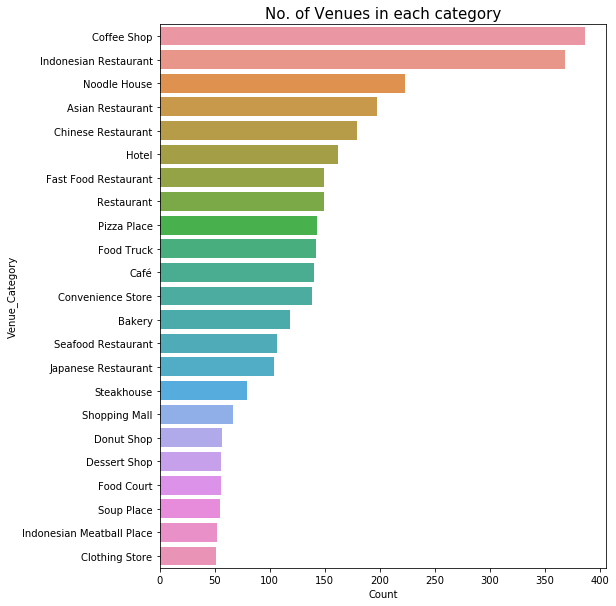

In [12]:
import seaborn as sns # Library for visualize
import matplotlib.pyplot as plt # Library for visualize

plt.figure(figsize=(8,10))
ax = sns.barplot(x='Count',y='Venue_Category', data=sort_venues)
plt.title('No. of Venues in each category',size=15)
plt.show()

**GroupBy jkt_venues by "Neighborhood" column. And check how many venues were returned for each neighborhood.**

In [13]:
jkt_venues.groupby('Neighborhood').count().reset_index()

Neighborhood  Latitude  Longitude  Venue  Venue_Latitude  \
0                 Batu Ampar       295        295    295             295   
1                     Bungur       100        100    100             100   
2                Cakranegara       100        100    100             100   
3                     Cakung        41         41     41              41   
4              Cempaka Putih       100        100    100             100   
5                 Cengkareng        55         55     55              55   
6                   Cilandak       100        100    100             100   
7                  Cilincing         5          5      5               5   
8                   Cipayung        80         80     80              80   
9                    Ciracas        43         43     43              43   
10               Duren Sawit        61         61     61              61   
11                    Gambir       100        100    100             100   
12                    Grogol       300        300    300             300   
13         Grogol Petamburan       100        100    100             100   
14                    Guntur       100        100    100             100   
15                 Jagakarsa        52         52     52              52   
16                Jatinegara       176        176    176             176   
17                Johar Baru       100        100    100             100   
18                Kali Deres        97         97     97              97   
19            Kampung Melayu       100        100    100             100   
20            Kebayoran Baru       100        100    100             100   
21            Kebayoran Lama       100        100    100             100   
22               Kebon Jeruk       100        100    100             100   
23             Kelapa Gading       100        100    100             100   
24                 Kemayoran       100        100    100             100   
25                 Kembangan       100        100    100             100   
26  Kepulauan Seribu Selatan         6          6      6               6   
27    Kepulauan Seribu Utara         1          1      1               1   
28                      Koja        38         38     38              38   
29               Kramat Jati        52         52     52              52   
30          Mampang Prapatan       100        100    100             100   
31                  Matraman       100        100    100             100   
32                   Melagai       100        100    100             100   
33                   Menteng       100        100    100             100   
34                    Munjul        33         33     33              33   
35                Pademangan       100        100    100             100   
36                  Palmerah       100        100    100             100   
37                  Pancoran       100        100    100             100   
38              Pasar Minggu       100        100    100             100   
39                Pasar Rebo        41         41     41              41   
40                Pengadegan       100        100    100             100   
41               Penjaringan       100        100    100             100   
42              Pesanggrahan        73         73     73              73   
43             Pondok Kelapa        71         71     71              71   
44               Pulo Gadung       100        100    100             100   
45                  Rambutan       166        166    166             166   
46               Sawah Besar       100        100    100             100   
47                    Selong       100        100    100             100   
48                     Senen       100        100    100             100   
49                Setia Budi       100        100    100             100   
50                   Susukan       123        123    123             123   
51               Tanah Abang       200        200    200        

**Find out unique category**

In [14]:
print('There are {} Uniques Cateogory'.format(len(jkt_venues['Venue_Category'].unique())))

There are 255 Uniques Cateogory


**Because we will build new Bakery Shop, let's find out column "Venue_Category" that contains 'Bakery' value.**

In [15]:
jkt_venues['Venue_Category'].unique()

array(['Restaurant', 'Pizza Place', 'BBQ Joint', 'Coffee Shop',
       'Food Truck', 'Donut Shop', 'General Entertainment', 'Museum',
       'Event Space', 'Convenience Store', 'Indonesian Restaurant',
       'Breakfast Spot', 'Noodle House', 'Beijing Restaurant',
       'Snack Place', 'Skate Park', 'Lounge', 'Church',
       'Seafood Restaurant', 'Japanese Restaurant', 'Garden',
       'Martial Arts Dojo', 'Bookstore', 'Multiplex', 'Food Court',
       'Market', 'Pharmacy', 'Movie Theater', 'Water Park', 'Soup Place',
       'Supermarket', 'Rest Area', 'Miscellaneous Shop',
       'Theme Park Ride / Attraction', 'Fast Food Restaurant',
       'Burger Joint', 'Bakery', 'Flea Market', 'Tea Room', 'Café',
       'Theater', 'History Museum', 'Monument / Landmark',
       'Shopping Mall', 'Hotel', 'Javanese Restaurant', 'Nightclub',
       'Chinese Restaurant', 'Brazilian Restaurant', 'Diner', 'Hotel Bar',
       'Fruit & Vegetable Store', 'Deli / Bodega', 'Steakhouse',
       'Italian Res

In [16]:
print(jkt_venues[jkt_venues['Venue_Category']=='Bakery'].shape)
bake_venues = jkt_venues[jkt_venues['Venue_Category']=='Bakery']
bake_venues = bake_venues.sort_values('Neighborhood')
bake_venues

(118, 7)


Neighborhood  Latitude  Longitude  \
4939         Batu Ampar  -6.27482  106.86209   
5117         Batu Ampar  -6.27482  106.86209   
5098         Batu Ampar  -6.27482  106.86209   
4958         Batu Ampar  -6.27482  106.86209   
4880         Batu Ampar  -6.27482  106.86209   
4840         Batu Ampar  -6.27482  106.86209   
4821         Batu Ampar  -6.27482  106.86209   
438          Batu Ampar  -6.27482  106.86209   
457          Batu Ampar  -6.27482  106.86209   
4899         Batu Ampar  -6.27482  106.86209   
5084             Bungur  -6.17181  106.84881   
4762        Cakranegara  -6.27877  106.76424   
4727        Cakranegara  -6.27877  106.76424   
4720        Cakranegara  -6.27877  106.76424   
2423      Cempaka Putih  -6.18267  106.86799   
688            Cilandak  -6.28453  106.80014   
661            Cilandak  -6.28453  106.80014   
662            Cilandak  -6.28453  106.80014   
3823           Cipayung  -6.32725  106.90045   
1513           Cipayung  -6.32725  106.90045   
1751        Duren Sawit  -6.22954  106.91815   
1704        Duren Sawit  -6.22954  106.91815   
2750             Gambir  -6.17134  106.82374   
4465             Grogol  -6.16086  106.79277   
4598             Grogol  -6.16086  106.79277   
4081             Grogol  -6.16086  106.79277   
3175  Grogol Petamburan  -6.16228  106.78834   
4104             Guntur  -6.20803  106.83406   
4195             Guntur  -6.20803  106.83406   
4140             Guntur  -6.20803  106.83406   
4133             Guntur  -6.20803  106.83406   
4328         Jatinegara  -6.23070  106.88274   
1683         Jatinegara  -6.23070  106.88274   
1633         Jatinegara  -6.23070  106.88274   
4378         Jatinegara  -6.23070  106.88274   
2380         Johar Baru  -6.18305  106.85619   
2363         Johar Baru  -6.18305  106.85619   
3342         Kali Deres  -6.13429  106.70577   
435      Kampung Melayu  -6.22996  106.86651   
407      Kampung Melayu  -6.22996  106.86651   
372      Kampung Melayu  -6.22996  106.86651   
346      Kampung Melayu  -6.22996  106.86651   
402      Kampung Melayu  -6.22996  106.86651   
988      Kebayoran Baru  -6.24362  106.80014   
964      Kebayoran Baru  -6.24362  106.80014   
913      Kebayoran Lama  -6.24439  106.77654   
895      Kebayoran Lama  -6.24439  106.77654   
839      Kebayoran Lama  -6.24439  106.77654   
833      Kebayoran Lama  -6.24439  106.77654   
2905        Kebon Jeruk  -6.19594  106.77360   
3709      Kelapa Gading  -6.16045  106.90546   
3770      Kelapa Gading  -6.16045  106.90546   
3720      Kelapa Gading  -6.16045  106.90546   
3704      Kelapa Gading  -6.16045  106.90546   
3714      Kelapa Gading  -6.16045  106.90546   
2826          Kembangan  -6.19123  106.74232   
3652               Koja  -6.11766  106.90635   
1557        Kramat Jati  -6.27330  106.86947   
1575        Kramat Jati  -6.27330  106.86947   
1083   Mampang Prapatan  -6.25061  106.82079   
1099   Mampang Prapatan  -6.25061  106.82079   
1064   Mampang Prapatan  -6.25061  106.82079   
1049   Mampang Prapatan  -6.25061  106.82079   
1048   Mampang Prapatan  -6.25061  106.82079   
1039   Mampang Prapatan  -6.25061  106.82079   
5184            Melagai  -6.24485  106.80161   
5208            Melagai  -6.24485  106.80161   
2166            Menteng  -6.19403  106.83259   
2142            Menteng  -6.19403  106.83259   
4517             Munjul  -6.35038  106.89750   
4489             Munjul  -6.35038  106.89750   
3025           Palmerah  -6.19007  106.79719   
3058           Palmerah  -6.19007  106.79719   
1153           Pancoran  -6.25230  106.84734   
1177           Pancoran  -6.25230  106.84734   
1217           Pancoran  -6.25230  106.84734   
615        Pasar Minggu  -6.29398  106.82374   
564        Pasar Minggu  -6.29398  106.82374   
1431         Pasar Rebo  -6.32616  106.85619   
3879         Pengadegan  -6.24823  106.85471   
3923         Pengadegan  -6.24823  106.85471   
3954         Pengadegan  -6.24823  106.85471   
3415        Penjaringan  -6

**Visualize Bakery Shop of every Region.**

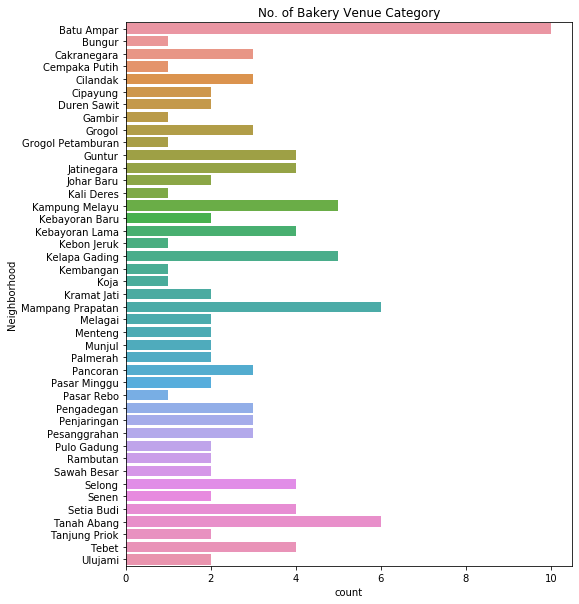

In [17]:
plt.figure(figsize=(8,10))
sns.countplot(y='Neighborhood', data=bake_venues)
plt.title('No. of Bakery Venue Category')
plt.show()

**Analyze each Neighborhood.**

In [18]:
# one hot encoding
onehot_jkt = pd.get_dummies(jkt_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot_jkt['Neighborhoods'] = jkt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot_jkt.columns[-1]] + list(onehot_jkt.columns[:-1])
onehot_jkt = onehot_jkt[fixed_columns]

print(onehot_jkt.shape)
onehot_jkt.head()

(5298, 256)


Neighborhoods  Accessories Store  Acehnese Restaurant  African Restaurant  \
0      Rambutan                  0                    0                   0   
1      Rambutan                  0                    0                   0   
2      Rambutan                  0                    0                   0   
3      Rambutan                  0                    0                   0   
4      Rambutan                  0                    0                   0   

   Airport  American Restaurant  Aquarium  Arcade  Art Gallery  Art Museum  \
0        0                    0         0       0            0           0   
1        0                    0         0       0            0           0   
2        0                    0         0       0            0           0   
3        0                    0         0       0            0           0   
4        0                    0         0       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  Auto Dealership  Automotive Shop  BBQ Joint  Bakery  \
0                      0                0                0          0       0   
1                      0                0                0          0       0   
2                      0                0                0          1       0   
3                      0                0                0          0       0   
4                      0                0                0          0       0   

   Balinese Restaurant  Bank  Bar  Baseball Stadium  Basketball Court  \
0                    0     0    0                 0                 0   
1                    0     0    0                 0                 0   
2                    0     0    0                 0                 0   
3                    0     0    0                 0                 0   
4                    0     0    0                 0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                   0      0                0         0            0   
1                   0      0                0         0            0   
2                   0      0                0         0            0   
3                   0      0                0         0            0   
4                   0      0                0         0            0   

   Beijing Restaurant  Betawinese Restaurant  Big Box Store  Bistro  \
0                   0                      0              0       0   
1                   0                      0              0       0   
2                   0                      0              0       0   
3                   0                      0              0       0   
4                   0                      0              0       0   

   Board Shop  Boarding House  Boat or Ferry  Bookstore  Boutique  \
0           0               0              0          0         0   
1           0               0              0          0         0   
2           0               0              0          0         0   
3           0               0              0          0         0   
4           0               0              0          0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot  Bridal Shop  \
0              0                     0               0            0   
1              0                     0               0            0   
2              0                     0               0            0   
3              0                     0               0            0   
4              0                     0               0            0   

   Bubble Tea Shop  Buffet  Building  Burger 

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [19]:
grouped_jkt = onehot_jkt.groupby(["Neighborhoods"]).mean().reset_index()

print('Size of grouped_jkt is {}'.format(grouped_jkt.shape))
grouped_jkt

Size of grouped_jkt is (56, 256)


Neighborhoods  Accessories Store  Acehnese Restaurant  \
0                 Batu Ampar               0.00             0.000000   
1                     Bungur               0.01             0.000000   
2                Cakranegara               0.00             0.000000   
3                     Cakung               0.00             0.000000   
4              Cempaka Putih               0.00             0.010000   
5                 Cengkareng               0.00             0.000000   
6                   Cilandak               0.00             0.000000   
7                  Cilincing               0.00             0.000000   
8                   Cipayung               0.00             0.000000   
9                    Ciracas               0.00             0.000000   
10               Duren Sawit               0.00             0.000000   
11                    Gambir               0.00             0.000000   
12                    Grogol               0.00             0.000000   
13         Grogol Petamburan               0.00             0.000000   
14                    Guntur               0.00             0.000000   
15                 Jagakarsa               0.00             0.019231   
16                Jatinegara               0.00             0.000000   
17                Johar Baru               0.01             0.010000   
18                Kali Deres               0.00             0.000000   
19            Kampung Melayu               0.00             0.000000   
20            Kebayoran Baru               0.00             0.000000   
21            Kebayoran Lama               0.00             0.000000   
22               Kebon Jeruk               0.00             0.000000   
23             Kelapa Gading               0.00             0.000000   
24                 Kemayoran               0.01             0.000000   
25                 Kembangan               0.00             0.000000   
26  Kepulauan Seribu Selatan               0.00             0.000000   
27    Kepulauan Seribu Utara               0.00             0.000000   
28                      Koja               0.00             0.000000   
29               Kramat Jati               0.00             0.000000   
30          Mampang Prapatan               0.00             0.000000   
31                  Matraman               0.00             0.000000   
32                   Melagai               0.00             0.000000   
33                   Menteng               0.00             0.000000   
34                    Munjul               0.00             0.000000   
35                Pademangan               0.01             0.000000   
36                  Palmerah               0.00             0.000000   
37                  Pancoran               0.00             0.010000   
38              Pasar Minggu               0.00             0.010000   
39                Pasar Rebo               0.00             0.000000   
40                Pengadegan               0.00             0.010000   
41               Penjaringan               0.00             0.000000   
42              Pesanggrahan               0.00             0.000000   
43             Pondok Kelapa               0.00             0.000000   
44               Pulo Gadung               0.00             0.000000   
45                  Rambutan               0.00             0.000000   
46               Sawah Besar               0.00             0.000000   
47                    Selong               0.00             0.000000   
48                     Senen               0.00             0.000000   
49                Setia Budi               0.00             0.000000   
50                   Susukan               0.00             0.000000   
51               Tanah Abang               0.00             0.000000   
52             Tanjung Priok               0.00             0.000000   
53                     Tebet               0.00             0.000000   
54                   Ulujami               0.00        

**Now, let's create a dataframe that contains 'Bakery' value only.**

In [20]:
len(grouped_jkt[grouped_jkt['Bakery']>0])

43

In [21]:
jkt_bakery = grouped_jkt[['Neighborhoods','Bakery']]
jkt_bakery.sort_values('Bakery',ascending=False)

Neighborhoods    Bakery
34                    Munjul  0.060606
30          Mampang Prapatan  0.060000
19            Kampung Melayu  0.050000
23             Kelapa Gading  0.050000
42              Pesanggrahan  0.041096
14                    Guntur  0.040000
53                     Tebet  0.040000
49                Setia Budi  0.040000
47                    Selong  0.040000
21            Kebayoran Lama  0.040000
29               Kramat Jati  0.038462
54                   Ulujami  0.036364
0                 Batu Ampar  0.033898
10               Duren Sawit  0.032787
37                  Pancoran  0.030000
40                Pengadegan  0.030000
41               Penjaringan  0.030000
6                   Cilandak  0.030000
51               Tanah Abang  0.030000
2                Cakranegara  0.030000
28                      Koja  0.026316
8                   Cipayung  0.025000
39                Pasar Rebo  0.024390
16                Jatinegara  0.022727
52             Tanjung Priok  0.021739
20            Kebayoran Baru  0.020000
32                   Melagai  0.020000
48                     Senen  0.020000
46               Sawah Besar  0.020000
44               Pulo Gadung  0.020000
36                  Palmerah  0.020000
33                   Menteng  0.020000
38              Pasar Minggu  0.020000
17                Johar Baru  0.020000
45                  Rambutan  0.012048
18                Kali Deres  0.010309
13         Grogol Petamburan  0.010000
22               Kebon Jeruk  0.010000
1                     Bungur  0.010000
12                    Grogol  0.010000
11                    Gambir  0.010000
4              Cempaka Putih  0.010000
25                 Kembangan  0.010000
31                  Matraman  0.000000
7                  Cilincing  0.000000
3                     Cakung  0.000000
5                 Cengkareng  0.000000
50                   Susukan  0.000000
27    Kepulauan Seribu Utara  0.000000
24                 Kemayoran  0.000000
26  Kepulauan Seribu Selatan  0.000000
15                 Jagakarsa  0.000000
43             Pondok Kelapa  0.000000
9                    Ciracas  0.000000
35                Pademangan  0.000000
55                    Wereka  0.000000

**Now, it's time for cluster the Neighborhood.**

In [22]:
grouped_jkt_cluster = grouped_jkt.drop('Neighborhoods', 1)

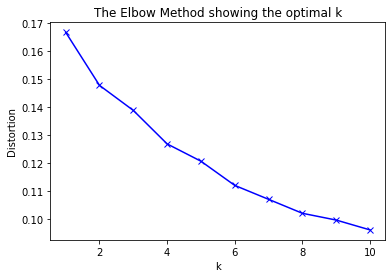

In [23]:
# Using K-Means to get cluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(grouped_jkt_cluster)
    #kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(grouped_jkt_cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / grouped_jkt_cluster.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [24]:
# Set number of clusters
kclusters = 4

bake_cluster = jkt_bakery.drop(["Neighborhoods"], 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bake_cluster)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([1, 0, 1, 0, 0])

In [25]:
# Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
merged_bake = jkt_bakery.copy()

# Add clustering label
merged_bake['Cluster Labels'] = kmeans.labels_

In [26]:
merged_bake.rename(columns={'Neighborhoods':'Neighborhood'}, inplace=True)
merged_bake.sort_values('Cluster Labels', ascending=False)

Neighborhood    Bakery  Cluster Labels
28                      Koja  0.026316               3
17                Johar Baru  0.020000               3
39                Pasar Rebo  0.024390               3
38              Pasar Minggu  0.020000               3
20            Kebayoran Baru  0.020000               3
44               Pulo Gadung  0.020000               3
46               Sawah Besar  0.020000               3
36                  Palmerah  0.020000               3
8                   Cipayung  0.025000               3
48                     Senen  0.020000               3
52             Tanjung Priok  0.021739               3
33                   Menteng  0.020000               3
32                   Melagai  0.020000               3
16                Jatinegara  0.022727               3
23             Kelapa Gading  0.050000               2
34                    Munjul  0.060606               2
19            Kampung Melayu  0.050000               2
30          Mampang Prapatan  0.060000               2
29               Kramat Jati  0.038462               1
41               Penjaringan  0.030000               1
42              Pesanggrahan  0.041096               1
37                  Pancoran  0.030000               1
47                    Selong  0.040000               1
49                Setia Budi  0.040000               1
51               Tanah Abang  0.030000               1
53                     Tebet  0.040000               1
54                   Ulujami  0.036364               1
40                Pengadegan  0.030000               1
0                 Batu Ampar  0.033898               1
2                Cakranegara  0.030000               1
6                   Cilandak  0.030000               1
21            Kebayoran Lama  0.040000               1
14                    Guntur  0.040000               1
10               Duren Sawit  0.032787               1
1                     Bungur  0.010000               0
11                    Gambir  0.010000               0
3                     Cakung  0.000000               0
4              Cempaka Putih  0.010000               0
5                 Cengkareng  0.000000               0
50                   Susukan  0.000000               0
7                  Cilincing  0.000000               0
9                    Ciracas  0.000000               0
45                  Rambutan  0.012048               0
12                    Grogol  0.010000               0
43             Pondok Kelapa  0.000000               0
27    Kepulauan Seribu Utara  0.000000               0
13         Grogol Petamburan  0.010000               0
15                 Jagakarsa  0.000000               0
18                Kali Deres  0.010309               0
22               Kebon Jeruk  0.010000               0
35                Pademangan  0.000000               0
24                 Kemayoran  0.000000               0
25                 Kembangan  0.010000               0
26  Kepulauan Seribu Selatan  0.000000               0
31                  Matraman  0.000000               0
55                    Wereka  0.000000               0

In [27]:
# Merge bake_grouped with jkt_data to add latitude/longitude for each neighborhood
merged_all = merged_bake.join(df_jkt.set_index('Neighborhood'), on='Neighborhood')

print(merged_all.shape)
merged_all = merged_all.sort_values('Cluster Labels', ascending=False)
merged_all

(68, 5)


Neighborhood    Bakery  Cluster Labels  latitude  longitude
16                Jatinegara  0.022727               3  -6.23070  106.88274
8                   Cipayung  0.025000               3  -6.32725  106.90045
36                  Palmerah  0.020000               3  -6.19007  106.79719
33                   Menteng  0.020000               3  -6.19403  106.83259
32                   Melagai  0.020000               3  -6.24485  106.80161
28                      Koja  0.026316               3  -6.11766  106.90635
44               Pulo Gadung  0.020000               3  -6.18171  106.89750
20            Kebayoran Baru  0.020000               3  -6.24362  106.80014
17                Johar Baru  0.020000               3  -6.18305  106.85619
16                Jatinegara  0.022727               3  -6.23070  106.88274
39                Pasar Rebo  0.024390               3  -6.32616  106.85619
46               Sawah Besar  0.020000               3  -6.15319  106.83259
48                     Senen  0.020000               3  -6.19346  106.85029
38              Pasar Minggu  0.020000               3  -6.29398  106.82374
8                   Cipayung  0.025000               3  -6.32725  106.90045
52             Tanjung Priok  0.021739               3  -6.13206  106.87148
19            Kampung Melayu  0.050000               2  -6.22996  106.86651
30          Mampang Prapatan  0.060000               2  -6.25061  106.82079
34                    Munjul  0.060606               2  -6.35038  106.89750
23             Kelapa Gading  0.050000               2  -6.16045  106.90546
21            Kebayoran Lama  0.040000               1  -6.24439  106.77654
41               Penjaringan  0.030000               1  -6.12674  106.78244
29               Kramat Jati  0.038462               1  -6.27330  106.86947
54                   Ulujami  0.036364               1  -6.24099  106.76327
42              Pesanggrahan  0.041096               1  -6.24743  106.76180
0                 Batu Ampar  0.033898               1  -6.27482  106.86209
2                Cakranegara  0.030000               1  -6.27877  106.76424
10               Duren Sawit  0.032787               1  -6.22954  106.91815
0                 Batu Ampar  0.033898               1  -6.27482  106.86209
53                     Tebet  0.040000               1  -6.23186  106.84734
0                 Batu Ampar  0.033898               1  -6.27482  106.86209
40                Pengadegan  0.030000               1  -6.24823  106.85471
51               Tanah Abang  0.030000               1  -6.20236  106.81194
6                   Cilandak  0.030000               1  -6.28453  106.80014
51               Tanah Abang  0.030000               1  -6.20236  106.81194
14                    Guntur  0.040000               1  -6.20803  106.83406
47                    Selong  0.040000               1  -6.23586  106.80309
49                Setia Budi  0.040000               1  -6.21957  106.83259
0                 Batu Ampar  0.033898               1  -6.27482  106.86209
37                  Pancoran  0.030000               1  -6.25230  106.84734
0                 Batu Ampar  0.033898               1  -6.27482  106.86209
50                   Susukan  0.000000               0  -6.31554  106.86799
43             Pondok Kelapa  0.000000               0  -6.23937  106.92996
45                  Rambutan  0.012048               0  -6.30511  106.87389
50                   Susukan  0.000000               0  -6.31554  106.86799
50                   Susukan  0.000000               0  -6.31554  106.86799
45                  Rambutan  0.012048               0  -6.30511  106.87389
26  Kepulauan Seribu Selatan  0.000000               0  -5.79853  106.50720
35                Pademangan  0.000000               0  -6.13260  106.83849
31                  Matraman  0.000000               0  -6.20328  106.86209
1                     Bungur  0.010000               0  -6.17181  106.84881
3                     Cakung  0.000000               0  -6.18263

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as colors

cluster_final = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_all['latitude'], merged_all['longitude'], merged_all['Neighborhood'], merged_all['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_final)
       
cluster_final

## 5. Result and Discussion <a name='result'></a>

Based on the analysis results above, it can be seen that the area of cluster 0 is indicated by a red point. This cluster is the area that most rarely has a bakery shop. And so on until the cluster 3 area is indicated by the yellow point which is the area with the highest number of bakery shop.

In [29]:
print(merged_all[merged_all['Cluster Labels']==0].sort_values('Neighborhood').shape)
merged_all[merged_all['Cluster Labels']==0].sort_values('Neighborhood')

(27, 5)


Neighborhood    Bakery  Cluster Labels  latitude  longitude
1                     Bungur  0.010000               0  -6.17181  106.84881
3                     Cakung  0.000000               0  -6.18263  106.94767
4              Cempaka Putih  0.010000               0  -6.18267  106.86799
5                 Cengkareng  0.000000               0  -6.14867  106.73526
7                  Cilincing  0.000000               0  -6.12143  106.94767
9                    Ciracas  0.000000               0  -6.32312  106.87094
11                    Gambir  0.010000               0  -6.17134  106.82374
12                    Grogol  0.010000               0  -6.16086  106.79277
12                    Grogol  0.010000               0  -6.16086  106.79277
12                    Grogol  0.010000               0  -6.16086  106.79277
13         Grogol Petamburan  0.010000               0  -6.16228  106.78834
15                 Jagakarsa  0.000000               0  -6.33492  106.82374
18                Kali Deres  0.010309               0  -6.13429  106.70577
22               Kebon Jeruk  0.010000               0  -6.19594  106.77360
24                 Kemayoran  0.000000               0  -6.16037  106.84734
25                 Kembangan  0.010000               0  -6.19123  106.74232
26  Kepulauan Seribu Selatan  0.000000               0  -5.79853  106.50720
27    Kepulauan Seribu Utara  0.000000               0  -5.50177  106.55008
31                  Matraman  0.000000               0  -6.20328  106.86209
35                Pademangan  0.000000               0  -6.13260  106.83849
43             Pondok Kelapa  0.000000               0  -6.23937  106.92996
45                  Rambutan  0.012048               0  -6.30511  106.87389
45                  Rambutan  0.012048               0  -6.30511  106.87389
50                   Susukan  0.000000               0  -6.31554  106.86799
50                   Susukan  0.000000               0  -6.31554  106.86799
50                   Susukan  0.000000               0  -6.31554  106.86799
55                    Wereka  0.000000               0  -6.32285  106.87013

In [30]:
print(merged_all[merged_all['Cluster Labels']==1].sort_values('Neighborhood').shape)
merged_all[merged_all['Cluster Labels']==1].sort_values('Neighborhood')

(21, 5)


Neighborhood    Bakery  Cluster Labels  latitude  longitude
0       Batu Ampar  0.033898               1  -6.27482  106.86209
0       Batu Ampar  0.033898               1  -6.27482  106.86209
0       Batu Ampar  0.033898               1  -6.27482  106.86209
0       Batu Ampar  0.033898               1  -6.27482  106.86209
0       Batu Ampar  0.033898               1  -6.27482  106.86209
2      Cakranegara  0.030000               1  -6.27877  106.76424
6         Cilandak  0.030000               1  -6.28453  106.80014
10     Duren Sawit  0.032787               1  -6.22954  106.91815
14          Guntur  0.040000               1  -6.20803  106.83406
21  Kebayoran Lama  0.040000               1  -6.24439  106.77654
29     Kramat Jati  0.038462               1  -6.27330  106.86947
37        Pancoran  0.030000               1  -6.25230  106.84734
40      Pengadegan  0.030000               1  -6.24823  106.85471
41     Penjaringan  0.030000               1  -6.12674  106.78244
42    Pesanggrahan  0.041096               1  -6.24743  106.76180
47          Selong  0.040000               1  -6.23586  106.80309
49      Setia Budi  0.040000               1  -6.21957  106.83259
51     Tanah Abang  0.030000               1  -6.20236  106.81194
51     Tanah Abang  0.030000               1  -6.20236  106.81194
53           Tebet  0.040000               1  -6.23186  106.84734
54         Ulujami  0.036364               1  -6.24099  106.76327

In [31]:
print(merged_all[merged_all['Cluster Labels']==2].sort_values('Neighborhood').shape)
merged_all[merged_all['Cluster Labels']==2].sort_values('Neighborhood')

(4, 5)


Neighborhood    Bakery  Cluster Labels  latitude  longitude
19    Kampung Melayu  0.050000               2  -6.22996  106.86651
23     Kelapa Gading  0.050000               2  -6.16045  106.90546
30  Mampang Prapatan  0.060000               2  -6.25061  106.82079
34            Munjul  0.060606               2  -6.35038  106.89750

In [32]:
print(merged_all[merged_all['Cluster Labels']==3].sort_values('Neighborhood').shape)
merged_all[merged_all['Cluster Labels']==3].sort_values('Neighborhood')

(16, 5)


Neighborhood    Bakery  Cluster Labels  latitude  longitude
8         Cipayung  0.025000               3  -6.32725  106.90045
8         Cipayung  0.025000               3  -6.32725  106.90045
16      Jatinegara  0.022727               3  -6.23070  106.88274
16      Jatinegara  0.022727               3  -6.23070  106.88274
17      Johar Baru  0.020000               3  -6.18305  106.85619
20  Kebayoran Baru  0.020000               3  -6.24362  106.80014
28            Koja  0.026316               3  -6.11766  106.90635
32         Melagai  0.020000               3  -6.24485  106.80161
33         Menteng  0.020000               3  -6.19403  106.83259
36        Palmerah  0.020000               3  -6.19007  106.79719
38    Pasar Minggu  0.020000               3  -6.29398  106.82374
39      Pasar Rebo  0.024390               3  -6.32616  106.85619
44     Pulo Gadung  0.020000               3  -6.18171  106.89750
46     Sawah Besar  0.020000               3  -6.15319  106.83259
48           Senen  0.020000               3  -6.19346  106.85029
52   Tanjung Priok  0.021739               3  -6.13206  106.87148

## 6. Conclusion <a name='conclusion'></a>

Conclusion to the results of the analysis that has been done, the most strategic area to open a new bakery is located in the area of cluster 0. Because, in the cluster there are less Bakery Shop than the other Cluster.